In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')
matches.drop('Unnamed: 0',axis=1,inplace=True)
deliveries.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)

In [3]:
# def changeName(cols):
#     if cols=='Rising Pune Supergiant':
#         return 'Rising Pune Supergiants'
    
#     else:
        
#         return cols

# deliveries['batting_team']=deliveries['batting_team'].apply(changeName)
# deliveries['bowling_team']=deliveries['bowling_team'].apply(changeName)

In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.5+ KB


In [5]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
match_id            150460 non-null int64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null object
over                150460 non-null int64
ball                150460 non-null int64
batsman             150460 non-null object
non_striker         150460 non-null object
bowler              150460 non-null object
is_super_over       150460 non-null int64
wide_runs           150460 non-null int64
bye_runs            150460 non-null int64
legbye_runs         150460 non-null int64
noball_runs         150460 non-null int64
penalty_runs        150460 non-null int64
batsman_runs        150460 non-null int64
extra_runs          150460 non-null int64
total_runs          150460 non-null int64
player_dismissed    7438 non-null object
dismissal_kind      7438 non-null object
fielder             5369 non-null object
dtype

In [6]:
matches=matches[matches['dl_applied']!=1]
matches=matches[matches['result']!='no result']

In [7]:
templist=list(matches['id'])
deliveries=deliveries[deliveries['match_id'].isin(templist)]

In [8]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147458 entries, 0 to 150459
Data columns (total 21 columns):
match_id            147458 non-null int64
inning              147458 non-null int64
batting_team        147458 non-null object
bowling_team        147458 non-null object
over                147458 non-null int64
ball                147458 non-null int64
batsman             147458 non-null object
non_striker         147458 non-null object
bowler              147458 non-null object
is_super_over       147458 non-null int64
wide_runs           147458 non-null int64
bye_runs            147458 non-null int64
legbye_runs         147458 non-null int64
noball_runs         147458 non-null int64
penalty_runs        147458 non-null int64
batsman_runs        147458 non-null int64
extra_runs          147458 non-null int64
total_runs          147458 non-null int64
player_dismissed    7296 non-null object
dismissal_kind      7296 non-null object
fielder             5255 non-null object
dtype

In [9]:
score_per_innings=deliveries.groupby(['inning','match_id'])['total_runs'].sum()
score_per_innings=pd.DataFrame(score_per_innings)

In [10]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 635
Data columns (total 18 columns):
id                 617 non-null int64
season             617 non-null int64
city               610 non-null object
date               617 non-null object
team1              617 non-null object
team2              617 non-null object
toss_winner        617 non-null object
toss_decision      617 non-null object
result             617 non-null object
dl_applied         617 non-null int64
winner             617 non-null object
win_by_runs        617 non-null int64
win_by_wickets     617 non-null int64
player_of_match    617 non-null object
venue              617 non-null object
umpire1            616 non-null object
umpire2            616 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 91.6+ KB


In [11]:
score_per_innings[:617].shape

(617, 1)

In [12]:
score_per_innings[618:618+616].shape

(616, 1)

In [13]:
score_per_innings.reset_index(level=0, inplace=True)
score_per_innings.drop('inning',axis=1,inplace=True)
score_per_innings.reset_index(level=0, inplace=True)
score_per_innings.columns=['id','first_innings_runs']

In [14]:
second_innings_score=score_per_innings[618:618+616]
first_innings_score=score_per_innings[0:617]

In [15]:
matches=pd.merge(matches,pd.DataFrame(first_innings_score),on='id')

In [16]:
# second_innings_score.columns=['id','second_innings_runs']
# second_innings_score.head()
#matches=pd.merge(matches,pd.DataFrame(second_innings_score),on='id')

In [17]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 616
Data columns (total 19 columns):
id                    617 non-null int64
season                617 non-null int64
city                  610 non-null object
date                  617 non-null object
team1                 617 non-null object
team2                 617 non-null object
toss_winner           617 non-null object
toss_decision         617 non-null object
result                617 non-null object
dl_applied            617 non-null int64
winner                617 non-null object
win_by_runs           617 non-null int64
win_by_wickets        617 non-null int64
player_of_match       617 non-null object
venue                 617 non-null object
umpire1               616 non-null object
umpire2               616 non-null object
umpire3               0 non-null float64
first_innings_runs    617 non-null int64
dtypes: float64(1), int64(6), object(12)
memory usage: 96.4+ KB


In [18]:
matches.sort_values(['season','id'],inplace=True)

In [19]:
# def time_expanding(data,cols,x,y):
#     data_expanding=data.groupby(cols).expanding()
#     data_score=pd.DataFrame(data_expanding['first_innings_runs'].mean()).apply(round)
#     data_score.reset_index(level=0, inplace=True)
#     data_score.reset_index(level=0, inplace=True)
#     data_score['id']=data_score[['index']].apply(lambda x : x+1)
#     data_score.drop(['index',x],axis=1,inplace=True)
#     data_score.columns=[y,'id']
#     return pd.merge(data,data_score,on='id')

In [20]:
shifted=matches.groupby('venue')['first_innings_runs'].shift(1)
shifted=shifted.rename('shifted_score')
matches=pd.concat([matches,shifted],axis=1)

In [21]:
matches['average_venue_score']=(matches.groupby('venue')['shifted_score'].cumsum()/matches.groupby('venue').cumcount()).round()

In [22]:
shifted=matches.groupby('team1')['first_innings_runs'].shift(1)
shifted=shifted.rename('shifted_batting_score')
matches=pd.concat([matches,shifted],axis=1)

In [23]:
matches['average_first_batting_score']=(matches.groupby('team1')['shifted_batting_score'].cumsum()/matches.groupby('team1').cumcount()).round()

In [24]:
shifted=matches.groupby('team2')['first_innings_runs'].shift(1)
shifted=shifted.rename('shifted_bowling_score')
matches=pd.concat([matches,shifted],axis=1)

In [25]:
matches['average_first_bowling_score']=(matches.groupby('team2')['shifted_bowling_score'].cumsum()/matches.groupby('team2').cumcount()).round()

In [26]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,umpire1,umpire2,umpire3,first_innings_runs,shifted_score,average_venue_score,shifted_batting_score,average_first_batting_score,shifted_bowling_score,average_first_bowling_score
53,54,2017,Pune,2017-05-14,Kings XI Punjab,Rising Pune Supergiants,Rising Pune Supergiants,field,normal,0,...,AY Dandekar,A Deshmukh,NaN,73,161.0,173.0,230.0,162.0,168.0,166.0
54,55,2017,Delhi,2017-05-14,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,...,CK Nandan,C Shamshuddin,NaN,161,168.0,165.0,158.0,166.0,195.0,163.0
55,56,2017,Mumbai,2017-05-16,Rising Pune Supergiants,Mumbai Indians,Mumbai Indians,field,normal,0,...,S Ravi,C Shamshuddin,NaN,162,230.0,164.0,148.0,166.0,230.0,159.0
56,58,2017,Bangalore,2017-05-19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,...,NJ Llong,Nitin Menon,NaN,107,158.0,169.0,155.0,157.0,162.0,159.0
57,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiants,Mumbai Indians,bat,normal,0,...,NJ Llong,S Ravi,NaN,129,138.0,158.0,173.0,164.0,73.0,158.0


In [27]:
matches.groupby('team2').mean()['first_innings_runs']

team2
Chennai Super Kings            160.490566
Deccan Chargers                162.718750
Delhi Daredevils               162.783133
Gujarat Lions                  173.750000
Kings XI Punjab                166.647059
Kochi Tuskers Kerala           142.833333
Kolkata Knight Riders          155.146667
Mumbai Indians                 158.640000
Pune Warriors                  157.280000
Rajasthan Royals               157.111111
Rising Pune Supergiants        156.000000
Royal Challengers Bangalore    161.911392
Sunrisers Hyderabad            156.724138
Name: first_innings_runs, dtype: float64

In [28]:
team1l=[]
team2l=[]
for i in range (0,len(matches)):
    tc=[0,0]
    wc=[0,0]
    x=5
    present=matches.loc[i]
    for j in range(i-1,-2,-1):
        if (tc[0]==x and tc[1]==x) or j==-1:
            team1l.append(round(wc[0]/x))
            team2l.append(round(wc[1]/x))
            break
        
        else:
            previous=matches.loc[j]
            if (previous['team1']==present['team1'] or previous['team2']== present['team1'] ) and tc[0]<x:
                tc[0]+=1
                wc[0]+=previous['first_innings_runs']
            if previous['team1']==present['team2'] or previous['team2']== present['team2'] and tc[1]<=x:
                tc[1]+=1
                wc[1]+=previous['first_innings_runs']
    


d=pd.Series(data=team1l,name='team1_form')
matches=pd.concat([matches,d],axis=1)
d=pd.Series(data=team2l,name='team2_form')
matches=pd.concat([matches,d],axis=1)

In [29]:
matches.tail()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,umpire3,first_innings_runs,shifted_score,average_venue_score,shifted_batting_score,average_first_batting_score,shifted_bowling_score,average_first_bowling_score,team1_form,team2_form
612,632,2016,Raipur,2016-05-22,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,NaN,138,158.0,148.0,162.0,155.0,183.0,162.0,171.0,190.0
613,633,2016,Bangalore,2016-05-24,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,NaN,158,248.0,171.0,126.0,146.0,138.0,162.0,166.0,2361.0
614,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,...,NaN,162,162.0,162.0,158.0,156.0,185.0,152.0,158.0,160.0
615,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,...,NaN,162,162.0,162.0,158.0,148.0,171.0,158.0,172.0,1396.0
616,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,...,NaN,208,158.0,171.0,162.0,156.0,158.0,161.0,166.0,176.0


In [30]:
matches['team1']=matches['team1'].map({'Kolkata Knight Riders':1,'Chennai Super Kings':2,'Rajasthan Royals':3,'Mumbai Indians':4,'Deccan Chargers':5,'Kings XI Punjab':6,'Royal Challengers Bangalore':7,'Delhi Daredevils':8,'Kochi Tuskers Kerala':9,'Pune Warriors':10,'Sunrisers Hyderabad':11,'Rising Pune Supergiants':12,'Rising Pune Supergiant':12,'Gujarat Lions':13})
matches['team2']=matches['team2'].map({'Kolkata Knight Riders':1,'Chennai Super Kings':2,'Rajasthan Royals':3,'Mumbai Indians':4,'Deccan Chargers':5,'Kings XI Punjab':6,'Royal Challengers Bangalore':7,'Delhi Daredevils':8,'Kochi Tuskers Kerala':9,'Pune Warriors':10,'Sunrisers Hyderabad':11,'Rising Pune Supergiants':12,'Rising Pune Supergiant':12,'Gujarat Lions':13})

In [31]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 616
Data columns (total 27 columns):
id                             617 non-null int64
season                         617 non-null int64
city                           610 non-null object
date                           617 non-null object
team1                          617 non-null int64
team2                          617 non-null int64
toss_winner                    617 non-null object
toss_decision                  617 non-null object
result                         617 non-null object
dl_applied                     617 non-null int64
winner                         617 non-null object
win_by_runs                    617 non-null int64
win_by_wickets                 617 non-null int64
player_of_match                617 non-null object
venue                          617 non-null object
umpire1                        616 non-null object
umpire2                        616 non-null object
umpire3                        0 no

In [32]:
temp_matches=matches[['team1','team2','average_venue_score','average_first_batting_score','average_first_bowling_score','first_innings_runs','team1_form','team2_form']]

In [33]:
temp_matches.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 616
Data columns (total 8 columns):
team1                          617 non-null int64
team2                          617 non-null int64
average_venue_score            582 non-null float64
average_first_batting_score    604 non-null float64
average_first_bowling_score    604 non-null float64
first_innings_runs             617 non-null int64
team1_form                     617 non-null float64
team2_form                     617 non-null float64
dtypes: float64(5), int64(3)
memory usage: 43.4 KB


In [34]:
temp_matches=temp_matches.dropna(how='any')

In [48]:
temp_matches.corr()

,team1,team2,average_venue_score,average_first_batting_score,average_first_bowling_score,first_innings_runs,team1_form,team2_form
team1,1.000000,-0.022245,0.109154,-0.231643,0.008901,0.011408,-0.108676,0.071707
team2,-0.022245,1.000000,0.042704,0.019773,0.114421,0.075167,-0.014608,-0.118137
average_venue_score,0.109154,0.042704,1.000000,0.055341,0.098153,0.051820,0.099748,0.022387
average_first_batting_score,-0.231643,0.019773,0.055341,1.000000,0.016522,0.044273,0.148760,-0.101554
average_first_bowling_score,0.008901,0.114421,0.098153,0.016522,1.000000,0.014218,-0.010668,-0.024014
first_innings_runs,0.011408,0.075167,0.051820,0.044273,0.014218,1.000000,-0.010405,0.018933
team1_form,-0.108676,-0.014608,0.099748,0.148760,-0.010668,-0.010405,1.000000,-0.003127
team2_form,0.071707,-0.118137,0.022387,-0.101554,-0.024014,0.018933,-0.003127,1.000000


In [35]:
y=temp_matches['first_innings_runs']
X=temp_matches.drop('first_innings_runs',axis=1)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# RandomForest

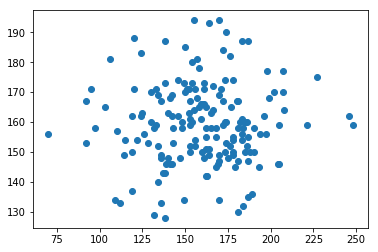

In [66]:
from sklearn.grid_search import GridSearchCV
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators':list(range(1,100)), 'max_features': ['auto', 'sqrt', 'log2']},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

from sklearn.ensemble import RandomForestRegressor
lm =  RandomForestRegressor()
lm.fit(X_train, y_train)
grid_search = GridSearchCV(lm, param_grid, cv=3,n_jobs = -1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions=predictions.round()
plt.scatter(y_test,predictions)

In [67]:
grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 46}

In [68]:

grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=46, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [69]:
imp_list=list(lm.feature_importances_)
col_lis = list(X_test.columns)

feature_importances = {i[0]:"{0:.4f}".format(i[1]) for i in list(zip(col_lis,imp_list))}

feature_importances

{'average_first_batting_score': '0.1491',
 'average_first_bowling_score': '0.1611',
 'average_venue_score': '0.1470',
 'team1': '0.1053',
 'team1_form': '0.1620',
 'team2': '0.0765',
 'team2_form': '0.1991'}

In [58]:
# from sklearn.ensemble import RandomForestRegressor
# model=RandomForestRegressor(n_estimators=100,n_jobs=-1,max_features='auto')
# model.fit(X_train,y_train)
# predictions=model.predict(X_test)

In [59]:
 #predictions=predictions.round()
# plt.scatter(y_test,predictions)

In [70]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

print('MSE:', metrics.mean_squared_error(y_test, predictions))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 25.0930232558
MSE: 988.802325581
RMSE: 31.4452273896


# LinearRegression

In [61]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)

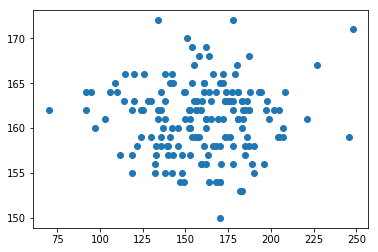

In [62]:
predictions=predictions.round()
plt.scatter(y_test,predictions)

In [63]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

print('MSE:', metrics.mean_squared_error(y_test, predictions))

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 22.761627907
MSE: 844.575581395
RMSE: 29.0615825687


In [64]:
predictions

array([ 164.,  166.,  157.,  161.,  169.,  153.,  159.,  172.,  158.,
        163.,  159.,  159.,  165.,  156.,  155.,  161.,  161.,  157.,
        157.,  160.,  158.,  159.,  158.,  163.,  171.,  158.,  163.,
        162.,  161.,  161.,  159.,  169.,  163.,  167.,  157.,  161.,
        154.,  163.,  156.,  156.,  161.,  155.,  156.,  156.,  163.,
        158.,  166.,  166.,  163.,  164.,  165.,  156.,  164.,  158.,
        157.,  150.,  161.,  159.,  167.,  164.,  159.,  153.,  161.,
        163.,  157.,  162.,  161.,  159.,  155.,  162.,  162.,  160.,
        158.,  158.,  163.,  154.,  160.,  156.,  160.,  165.,  163.,
        165.,  162.,  161.,  157.,  166.,  159.,  159.,  163.,  162.,
        164.,  162.,  162.,  166.,  155.,  163.,  168.,  160.,  164.,
        154.,  163.,  162.,  164.,  164.,  162.,  166.,  154.,  159.,
        159.,  162.,  158.,  160.,  166.,  167.,  161.,  161.,  168.,
        170.,  172.,  159.,  164.,  161.,  164.,  162.,  159.,  162.,
        159.,  163.,

In [65]:
y_test

552    106
82     126
150    119
440    172
587    154
352    182
212    174
29     134
93     133
341    160
503    173
309    205
578    143
553    171
573    138
95     221
342    150
188    148
113    163
367    162
85     187
319    124
436    166
291    128
603    248
88     122
273    178
602    124
267    169
84     103
      ... 
295    185
323    146
164    170
555    199
274    125
530     95
577    164
209    138
399    185
54     161
351    173
46     138
105    176
410    174
123    149
276    196
616    208
480    190
435    168
238    175
428    112
449    205
395    119
565    187
472    178
81     109
285    136
200    178
432    120
460     70
Name: first_innings_runs, Length: 172, dtype: int64